In [1]:
# Base Libraries
import pandas as pd
import numpy as np
import yfinance as yf
import pandas_ta as ta

# Plotting
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)
plt.style.use('fivethirtyeight')

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set display options
pd.set_option('display.max_rows',5000)
pd.set_option('display.max_columns',5000)
pd.set_option('display.width',1000)

# Set seed
np.random.seed(2023)

In [3]:
from urllib import request
import ssl

url="https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
context = ssl._create_unverified_context()
response = request.urlopen(url, context=context)
html = response.read()

sp500=pd.read_html(html)
sp500[0]

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
5,ATVI,Activision Blizzard,Communication Services,Interactive Home Entertainment,"Santa Monica, California",2015-08-31,718877,2008
6,ADM,ADM,Consumer Staples,Agricultural Products & Services,"Chicago, Illinois",1957-03-04,7084,1902
7,ADBE,Adobe Inc.,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982
8,ADP,ADP,Industrials,Human Resource & Employment Services,"Roseland, New Jersey",1981-03-31,8670,1949
9,AAP,Advance Auto Parts,Consumer Discretionary,Automotive Retail,"Raleigh, North Carolina",2015-07-09,1158449,1932


In [4]:
sp500_stocks = list(sp500[0]['Symbol'])
sp500_company_name = list(sp500[0]['Security'])

In [5]:
# Use Comprehension to fetch data for multiple fields
sp500_ohlc = {symbol: yf.download(symbol,start='2022-01-01',end='2023-06-01', auto_adjust=True, progress=False) for symbol in sp500_stocks}

# Save dow_ohlc for future use
# np.save('sp500_ohlc.npy',sp500_ohlc)


1 Failed download:
- BRK.B: No timezone found, symbol may be delisted

1 Failed download:
- BF.B: No data found for this date range, symbol may be delisted


In [13]:
sp500_ohlc['BRK.B']

KeyError: 'BRK.B'

In [19]:
sp500_stocks.remove('BF.B')

In [20]:
# Load dow_ohlc data
# ohlc = np.load('dow_ohlc.npy', allow_pickle=True).item()
ohlc = sp500_ohlc
ohlc['MMM'].head()

,Open,High,Low,Close,Volume,ATR
Date,,,,,,
2022-01-03 00:00:00-05:00,166.303337,167.021438,163.990450,165.762421,1930700,NaN
2022-01-04 00:00:00-05:00,166.452539,169.045199,166.032867,168.084610,2522200,NaN
2022-01-05 00:00:00-05:00,165.193506,169.530145,165.072262,167.394470,2952400,NaN
2022-01-06 00:00:00-05:00,168.690809,169.063848,165.575875,166.004883,2505400,NaN
2022-01-07 00:00:00-05:00,166.126125,168.327089,165.277445,167.823471,2800200,NaN


In [21]:
# Perform Technical Analysis
    
for symbol in sp500_stocks:
    high = ohlc[symbol]['High']
    low = ohlc[symbol]['Low']
    close = ohlc[symbol]['Close']
    ohlc[symbol]['ATR'] = ta.atr(high,low,close)

In [22]:
# Store stock prices in a dataframe
stock_price = pd.DataFrame({symbol: ohlc[symbol]['Close'] for symbol in sp500_stocks})
# stock_price = pd.DataFrame({symbol: ohlc[symbol]['Close'] for symbol in dow_stocks})
stock_ret = stock_price.resample('W-FRI').last().pct_change()

# Check for missing values
stock_ret.isnull().sum()   

MMM       1
AOS       1
ABT       1
ABBV      1
ACN       1
ATVI      1
ADM       1
ADBE      1
ADP       1
AAP       1
AES       1
AFL       1
A         1
APD       1
AKAM      1
ALK       1
ALB       1
ARE       1
ALGN      1
ALLE      1
LNT       1
ALL       1
GOOGL     1
GOOG      1
MO        1
AMZN      1
AMCR      1
AMD       1
AEE       1
AAL       1
AEP       1
AXP       1
AIG       1
AMT       1
AWK       1
AMP       1
ABC       1
AME       1
AMGN      1
APH       1
ADI       1
ANSS      1
AON       1
APA       1
AAPL      1
AMAT      1
APTV      1
ACGL      1
ANET      1
AJG       1
AIZ       1
T         1
ATO       1
ADSK      1
AZO       1
AVB       1
AVY       1
AXON      1
BKR       1
BALL      1
BAC       1
BBWI      1
BAX       1
BDX       1
WRB       1
BBY       1
BIO       1
TECH      1
BIIB      1
BLK       1
BK        1
BA        1
BKNG      1
BWA       1
BXP       1
BSX       1
BMY       1
AVGO      1
BR        1
BRO       1
BG        1
CHRW      1
CDNS      1
CZR 

In [23]:
[stock_ret[x].index[stock_ret[x].apply(np.isnan)] for x in sp500_stocks]

[DatetimeIndex(['2022-01-07 00:00:00-05:00'], dtype='datetime64[ns, America/New_York]', name='Date', freq='W-FRI'),
 DatetimeIndex(['2022-01-07 00:00:00-05:00'], dtype='datetime64[ns, America/New_York]', name='Date', freq='W-FRI'),
 DatetimeIndex(['2022-01-07 00:00:00-05:00'], dtype='datetime64[ns, America/New_York]', name='Date', freq='W-FRI'),
 DatetimeIndex(['2022-01-07 00:00:00-05:00'], dtype='datetime64[ns, America/New_York]', name='Date', freq='W-FRI'),
 DatetimeIndex(['2022-01-07 00:00:00-05:00'], dtype='datetime64[ns, America/New_York]', name='Date', freq='W-FRI'),
 DatetimeIndex(['2022-01-07 00:00:00-05:00'], dtype='datetime64[ns, America/New_York]', name='Date', freq='W-FRI'),
 DatetimeIndex(['2022-01-07 00:00:00-05:00'], dtype='datetime64[ns, America/New_York]', name='Date', freq='W-FRI'),
 DatetimeIndex(['2022-01-07 00:00:00-05:00'], dtype='datetime64[ns, America/New_York]', name='Date', freq='W-FRI'),
 DatetimeIndex(['2022-01-07 00:00:00-05:00'], dtype='datetime64[ns, Amer

In [24]:
stock_ret.fillna(method='ffill', axis=0,inplace=True)
stock_ret.drop(['GEHC'],axis=1, inplace=True)
stock_ret.dropna(inplace=True)

In [25]:
stock_ret.shape

(71, 500)

In [26]:
np.isnan(stock_ret.any()).sum()

0

In [27]:
weekly_ret = stock_ret.T

In [28]:
weekly_ret

Date,2022-01-28 00:00:00-05:00,2022-02-04 00:00:00-05:00,2022-02-11 00:00:00-05:00,2022-02-18 00:00:00-05:00,2022-02-25 00:00:00-05:00,2022-03-04 00:00:00-05:00,2022-03-11 00:00:00-05:00,2022-03-18 00:00:00-04:00,2022-03-25 00:00:00-04:00,2022-04-01 00:00:00-04:00,2022-04-08 00:00:00-04:00,2022-04-15 00:00:00-04:00,2022-04-22 00:00:00-04:00,2022-04-29 00:00:00-04:00,2022-05-06 00:00:00-04:00,2022-05-13 00:00:00-04:00,2022-05-20 00:00:00-04:00,2022-05-27 00:00:00-04:00,2022-06-03 00:00:00-04:00,2022-06-10 00:00:00-04:00,2022-06-17 00:00:00-04:00,2022-06-24 00:00:00-04:00,2022-07-01 00:00:00-04:00,2022-07-08 00:00:00-04:00,2022-07-15 00:00:00-04:00,2022-07-22 00:00:00-04:00,2022-07-29 00:00:00-04:00,2022-08-05 00:00:00-04:00,2022-08-12 00:00:00-04:00,2022-08-19 00:00:00-04:00,2022-08-26 00:00:00-04:00,2022-09-02 00:00:00-04:00,2022-09-09 00:00:00-04:00,2022-09-16 00:00:00-04:00,2022-09-23 00:00:00-04:00,2022-09-30 00:00:00-04:00,2022-10-07 00:00:00-04:00,2022-10-14 00:00:00-04:00,2022-10-21 00:00:00-04:00,2022-10-28 00:00:00-04:00,2022-11-04 00:00:00-04:00,2022-11-11 00:00:00-05:00,2022-11-18 00:00:00-05:00,2022-11-25 00:00:00-05:00,2022-12-02 00:00:00-05:00,2022-12-09 00:00:00-05:00,2022-12-16 00:00:00-05:00,2022-12-23 00:00:00-05:00,2022-12-30 00:00:00-05:00,2023-01-06 00:00:00-05:00,2023-01-13 00:00:00-05:00,2023-01-20 00:00:00-05:00,2023-01-27 00:00:00-05:00,2023-02-03 00:00:00-05:00,2023-02-10 00:00:00-05:00,2023-02-17 00:00:00-05:00,2023-02-24 00:00:00-05:00,2023-03-03 00:00:00-05:00,2023-03-10 00:00:00-05:00,2023-03-17 00:00:00-04:00,2023-03-24 00:00:00-04:00,2023-03-31 00:00:00-04:00,2023-04-07 00:00:00-04:00,2023-04-14 00:00:00-04:00,2023-04-21 00:00:00-04:00,2023-04-28 00:00:00-04:00,2023-05-05 00:00:00-04:00,2023-05-12 00:00:00-04:00,2023-05-19 00:00:00-04:00,2023-05-26 00:00:00-04:00,2023-06-02 00:00:00-04:00
MMM,-0.055314,-0.014531,-0.007404,-0.065770,0.019577,-0.025115,-0.039324,0.052213,0.014428,-0.005118,0.000802,-0.016220,0.012145,-0.033183,0.036818,-0.001538,-0.026902,0.039491,-0.023677,-0.056998,-0.056738,0.034581,-0.043475,0.001790,0.010954,0.030662,0.067999,0.029112,0.032766,-0.036455,-0.110606,-0.057999,0.011919,-0.052721,-0.031044,-0.022037,-0.026968,0.056827,0.027985,0.083811,-0.013902,0.065203,-0.035612,0.017987,-0.015887,-0.009686,-0.032363,-0.012737,-0.001831,0.056704,0.022017,-0.068412,-0.044758,0.019436,-0.030726,0.005322,-0.045933,0.032096,-0.064713,-0.009994,-0.018249,0.039253,-0.033774,0.041453,-0.012196,0.016654,-0.027019,-0.029802,0.002646,-0.021105,-0.037446
AOS,-0.013542,-0.025430,-0.030851,-0.001543,-0.025421,-0.014411,-0.039041,0.035453,-0.015871,-0.016276,-0.045689,0.014633,0.014893,-0.093430,0.016601,0.010269,-0.037327,0.059720,-0.006207,-0.045694,-0.085257,0.051026,0.003762,0.016777,-0.005617,0.041483,0.077356,-0.042200,0.053960,-0.019414,-0.067061,-0.036967,0.000355,-0.081187,-0.036543,-0.025085,0.018938,-0.009293,0.022227,0.091086,0.029423,0.071811,0.021333,0.009465,-0.023925,-0.034448,-0.038594,0.015165,0.005975,0.073375,0.011231,-0.047964,0.020456,0.149684,-0.042578,0.017093,-0.034801,0.049769,-0.029796,-0.009531,0.019398,0.036110,-0.065799,0.039009,0.024732,-0.002692,0.030605,-0.044615,0.017549,-0.025577,-0.040948
ABT,-0.003815,0.034783,-0.032534,-0.069328,0.048121,-0.008169,-0.060868,0.073934,-0.028583,-0.003110,0.039383,-0.041306,0.016569,-0.051321,-0.010837,-0.021288,0.030579,0.030466,-0.001028,-0.059535,-0.064763,0.067492,0.007035,-0.008710,0.000400,0.003492,-0.003297,0.003767,0.020412,-0.012738,-0.074141,0.005888,0.058341,-0.041298,-0.031923,-0.038935,0.051984,-0.003968,-0.057972,0.046602,-0.014273,0.061385,-0.002113,0.029749,0.010565,-0.005366,-0.005581,0.011879,0.014883,0.023135,0.015080,-0.006079,-0.025439,0.016735,-0.032472,-0.013129,-0.058835,0.039717,-0.071709,0.000516,0.010721,0.032738,0.036243,-0.004293,0.074067,-0.010657,0.007151,-0.006921,-0.014119,-0.055632,-0.008457
ABBV,0.045007,0.019794,0.009669,0.014224,0.038256,0.006821,-0.009963,0.068026,0.013379,0.008368,0.0754

In [29]:
stock_atr = pd.DataFrame({symbol: ohlc[symbol]['ATR'] for symbol in sp500_stocks})
stock_atr = stock_atr.resample('W-FRI').mean()

In [30]:
# Fill backward teh missing values and drop DOW from the list
stock_atr.fillna(method='bfill', axis=0, inplace=True)
stock_atr.drop(['GEHC'],axis = 1, inplace = True)

In [31]:
stock_atr.shape

(74, 500)

In [32]:
np.isnan(stock_ret.any()).sum()

0

In [33]:
weekly_atr = stock_atr.T
weekly_atr.head()

Date,2022-01-07 00:00:00-05:00,2022-01-14 00:00:00-05:00,2022-01-21 00:00:00-05:00,2022-01-28 00:00:00-05:00,2022-02-04 00:00:00-05:00,2022-02-11 00:00:00-05:00,2022-02-18 00:00:00-05:00,2022-02-25 00:00:00-05:00,2022-03-04 00:00:00-05:00,2022-03-11 00:00:00-05:00,2022-03-18 00:00:00-04:00,2022-03-25 00:00:00-04:00,2022-04-01 00:00:00-04:00,2022-04-08 00:00:00-04:00,2022-04-15 00:00:00-04:00,2022-04-22 00:00:00-04:00,2022-04-29 00:00:00-04:00,2022-05-06 00:00:00-04:00,2022-05-13 00:00:00-04:00,2022-05-20 00:00:00-04:00,2022-05-27 00:00:00-04:00,2022-06-03 00:00:00-04:00,2022-06-10 00:00:00-04:00,2022-06-17 00:00:00-04:00,2022-06-24 00:00:00-04:00,2022-07-01 00:00:00-04:00,2022-07-08 00:00:00-04:00,2022-07-15 00:00:00-04:00,2022-07-22 00:00:00-04:00,2022-07-29 00:00:00-04:00,2022-08-05 00:00:00-04:00,2022-08-12 00:00:00-04:00,2022-08-19 00:00:00-04:00,2022-08-26 00:00:00-04:00,2022-09-02 00:00:00-04:00,2022-09-09 00:00:00-04:00,2022-09-16 00:00:00-04:00,2022-09-23 00:00:00-04:00,2022-09-30 00:00:00-04:00,2022-10-07 00:00:00-04:00,2022-10-14 00:00:00-04:00,2022-10-21 00:00:00-04:00,2022-10-28 00:00:00-04:00,2022-11-04 00:00:00-04:00,2022-11-11 00:00:00-05:00,2022-11-18 00:00:00-05:00,2022-11-25 00:00:00-05:00,2022-12-02 00:00:00-05:00,2022-12-09 00:00:00-05:00,2022-12-16 00:00:00-05:00,2022-12-23 00:00:00-05:00,2022-12-30 00:00:00-05:00,2023-01-06 00:00:00-05:00,2023-01-13 00:00:00-05:00,2023-01-20 00:00:00-05:00,2023-01-27 00:00:00-05:00,2023-02-03 00:00:00-05:00,2023-02-10 00:00:00-05:00,2023-02-17 00:00:00-05:00,2023-02-24 00:00:00-05:00,2023-03-03 00:00:00-05:00,2023-03-10 00:00:00-05:00,2023-03-17 00:00:00-04:00,2023-03-24 00:00:00-04:00,2023-03-31 00:00:00-04:00,2023-04-07 00:00:00-04:00,2023-04-14 00:00:00-04:00,2023-04-21 00:00:00-04:00,2023-04-28 00:00:00-04:00,2023-05-05 00:00:00-04:00,2023-05-12 00:00:00-04:00,2023-05-19 00:00:00-04:00,2023-05-26 00:00:00-04:00,2023-06-02 00:00:00-04:00
MMM,3.780113,3.780113,3.780113,3.780113,4.132257,3.689388,3.588277,3.575247,3.780936,3.758986,3.661390,3.298775,3.067985,2.986753,2.830158,2.785817,2.970939,3.295603,3.677664,3.627832,3.664555,3.545509,3.340559,3.429175,3.285880,3.194567,3.115012,2.893476,2.686107,2.919399,2.940980,2.807465,2.638935,2.784230,3.486841,3.726826,3.708404,3.349566,3.000705,2.997694,3.033596,3.012724,3.144504,3.074517,2.972959,3.077638,2.775447,2.881168,2.917925,2.956603,2.933036,2.870081,2.807558,2.720318,2.808160,3.222492,3.222189,3.088149,2.804571,2.718845,2.679137,2.625773,2.663904,2.540107,2.280638,2.149920,2.048803,1.902206,1.860579,1.910700,1.926827,1.917100,2.104142,2.100974
AOS,2.528692,2.528692,2.528692,2.528692,2.433125,2.148227,2.014033,1.994503,2.045916,1.987670,1.890898,1.738133,1.631548,1.727462,1.679895,1.646335,1.754455,1.966343,2.038261,2.009377,1.934507,1.785654,1.652765,1.755268,1.703364,1.628329,1.666818,1.724830,1.776271,1.634422,1.743423,1.629912,1.538666,1.450764,1.430511,1.384479,1.483123,1.528446,1.451602,1.495689,1.410928,1.577361,1.588986,1.662362,1.742008,1.743561,1.563069,1.557475,1.500657,1.483031,1.461617,1.412515,1.463406,1.628705,1.719338,1.671427,2.105646,2.053098,1.889132,1.816363,1.685603,1.621104,1.706324,1.732985,1.620247,1.648142,1.586421,1.460980,1.440581,1.573520,1.502221,1.503013,1.445250,1.393099
ABT,3.046537,3.046537,3.046537,3.046537,3.117404,2.832129,2.932219,3.103980,3.159787,3.134930,3.050393,2.795726,2.521206,2.452891,2.629333,2.841442,2.902740,3.089683,3.249835,3.220872,3.063830,3.036298,2.862478,3.038710,2.966190,2.835796,2.652349,2.444659,2.526986,2.473393,2.290251,2.061668,1.887854,1.927891,1.973473,2.131046,2.178595,2.207866,2.179491,2.333339,2.455951,2.900456,2.871175,2.639353,2.530797,2.500529,2.293275,2.231251,2.251732,2.308567,2.204682,2.117835,2.140982,2.145452,2.110146,2.066309,1.946099,1.964027,1.916150,2.052465,2.093053,2.107601,2.141107,2.031181,1.882302,1.827642,1.771026,1.956384,2.005332,1.851243,1.688516,1.594038,1.648087,1.676166
ABBV,2.730974,2.730974,2.730974,2.730974,2.894169,2.805162,2.

In [34]:
weekly_atr.T.describe()

,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,AAP,AES,AFL,A,APD,AKAM,ALK,ALB,ARE,ALGN,ALLE,LNT,ALL,GOOGL,GOOG,MO,AMZN,AMCR,AMD,AEE,AAL,AEP,AXP,AIG,AMT,AWK,AMP,ABC,AME,AMGN,APH,ADI,ANSS,AON,APA,AAPL,AMAT,APTV,ACGL,ANET,AJG,AIZ,T,ATO,ADSK,AZO,AVB,AVY,AXON,BKR,BALL,BAC,BBWI,BAX,BDX,WRB,BBY,BIO,TECH,BIIB,BLK,BK,BA,BKNG,BWA,BXP,BSX,BMY,AVGO,BR,BRO,BG,CHRW,CDNS,CZR,CPT,CPB,COF,CAH,KMX,CCL,CARR,CTLT,CAT,CBOE,CBRE,CDW,CE,CNC,CNP,CDAY,CF,CRL,SCHW,CHTR,CVX,CMG,CB,CHD,CI,CINF,CTAS,CSCO,C,CFG,CLX,CME,CMS,KO,CTSH,CL,CMCSA,CMA,CAG,COP,ED,STZ,CEG,COO,CPRT,GLW,CTVA,CSGP,COST,CTRA,CCI,CSX,CMI,CVS,DHI,DHR,DRI,DVA,DE,DAL,XRAY,DVN,DXCM,FANG,DLR,DFS,DISH,DIS,DG,DLTR,D,DPZ,DOV,DOW,DTE,DUK,DD,DXC,EMN,ETN,EBAY,ECL,EIX,EW,EA,ELV,LLY,EMR,ENPH,ETR,EOG,EPAM,EQT,EFX,EQIX,EQR,ESS,EL,ETSY,RE,EVRG,ES,EXC,EXPE,EXPD,EXR,XOM,FFIV,FDS,FICO,FAST,FRT,FDX,FITB,FSLR,FE,FIS,FI,FLT,FMC,F,FTNT,FTV,FOXA,FOX,BEN,FCX,GRMN,IT,GEN,GNRC,GD,GE,GIS,GM,GPC,GILD,GL,GPN,GS,HAL,HIG,HAS,HCA,PEAK,HSIC,HSY,HES,HPE,HLT,HOLX,HD,HON,HRL,HST,HWM,HPQ,HUM,HBAN,HII,IBM,IEX,IDXX,ITW,ILMN,INCY,IR,PODD,INTC,ICE,IFF,IP,IPG,INTU,ISRG,IVZ,INVH,IQV,IRM,JBHT,JKHY,J,JNJ,JCI,JPM,JNPR,K,KDP,KEY,KEYS,KMB,KIM,KMI,KLAC,KHC,KR,LHX,LH,LRCX,LW,LVS,LDOS,LEN,LNC,LIN,LYV,LKQ,LMT,L,LOW,LYB,MTB,MRO,MPC,MKTX,MAR,MMC,MLM,MAS,MA,MTCH,MKC,MCD,MCK,MDT,MRK,META,MET,MTD,MGM,MCHP,MU,MSFT,MAA,MRNA,MHK,MOH,TAP,MDLZ,MPWR,MNST,MCO,MS,MOS,MSI,MSCI,NDAQ,NTAP,NFLX,NWL,NEM,NWSA,NWS,NEE,NKE,NI,NDSN,NSC,NTRS,NOC,NCLH,NRG,NUE,NVDA,NVR,NXPI,ORLY,OXY,ODFL,OMC,ON,OKE,ORCL,OGN,OTIS,PCAR,PKG,PARA,PH,PAYX,PAYC,PYPL,PNR,PEP,PFE,PCG,PM,PSX,PNW,PXD,PNC,POOL,PPG,PPL,PFG,PG,PGR,PLD,PRU,PEG,PTC,PSA,PHM,QRVO,PWR,QCOM,DGX,RL,RJF,RTX,O,REG,REGN,RF,RSG,RMD,RVTY,RHI,ROK,ROL,ROP,ROST,RCL,SPGI,CRM,SBAC,SLB,STX,SEE,SRE,NOW,SHW,SPG,SWKS,SJM,SNA,SEDG,SO,LUV,SWK,SBUX,STT,STLD,STE,SYK,SYF,SNPS,SYY,TMUS,TROW,TTWO,TPR,TRGP,TGT,TEL,TDY,TFX,TER,TSLA,TXN,TXT,TMO,TJX,TSCO,TT,TDG,TRV,TRMB,TFC,TYL,TSN,USB,UDR,ULTA,UNP,UAL,UPS,URI,UNH,UHS,VLO,VTR,VRSN,VRSK,VZ,VRTX,VFC,VTRS,VICI,V,VMC,WAB,WBA,WMT,WBD,WM,WAT,WEC,WFC,WELL,WST,WDC,WRK,WY,WHR,WMB,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000

In [35]:
# Import sklearn modules
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

from datetime import datetime

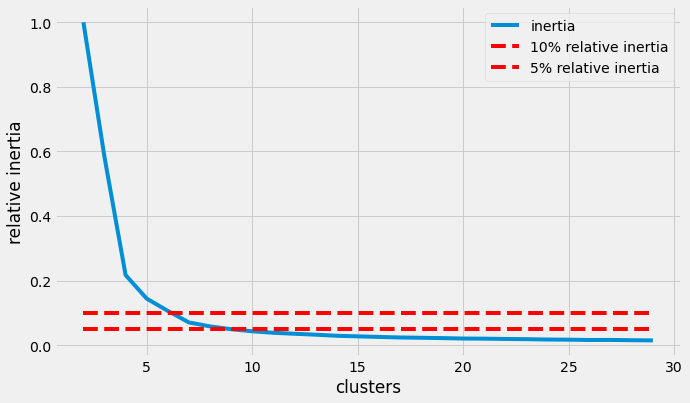

In [36]:
n_clusters = range(2,30)
inertia = []

for n in n_clusters:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(weekly_atr)
    inertia.append(kmeans.inertia_)

plt.plot(n_clusters,np.divide(inertia,inertia[0]))
plt.hlines(0.1,n_clusters[0],n_clusters[-1],'r',linestyles='dashed')
plt.hlines(0.05,n_clusters[0],n_clusters[-1],'r',linestyles='dashed')
plt.xlabel('clusters')
plt.ylabel('relative inertia')
plt.legend(['inertia','10% relative inertia','5% relative inertia']);

In [37]:
# Normalize and fit the model
model = Pipeline([
    ("normalization",MinMaxScaler()),
    ("cluster",KMeans(n_clusters=15))
])

In [38]:
model.fit(weekly_atr)

labels = model.predict(weekly_atr)

In [39]:
labels

array([ 0,  4,  4,  0,  5, 14,  4,  3,  9,  9, 14, 14,  0,  5,  4,  4, 10,
        9,  3,  0, 14,  0,  0,  0, 14,  9, 14,  9,  4, 14,  4,  9,  4,  5,
        0, 11,  0,  0,  9,  4,  9, 11,  5,  4,  9,  9,  9, 14,  9,  0,  0,
       14,  4,  5,  1,  9,  9,  5, 14,  4, 14,  4,  4,  9,  4,  0,  8,  0,
        5, 12, 14,  5,  7, 14,  4, 14, 14,  8,  0,  4,  0,  0,  9,  0,  0,
       14,  9,  4,  0, 14, 14,  0,  5,  0,  4,  9,  9,  4, 14,  0,  9, 11,
        4,  3,  9, 13,  9,  4,  5,  0, 11, 14, 14, 14,  0,  9, 14, 14,  4,
       14, 14,  0, 14,  0,  4,  9,  0, 11,  4, 14,  4,  4, 10, 14,  9, 14,
        5,  4,  0,  5,  0,  0, 11, 14, 14,  0,  9,  9,  0,  0, 14,  0,  9,
        9,  4, 11,  0, 14,  4,  4,  4, 14,  0,  0,  4,  9,  4,  0,  0, 10,
        5,  4, 10,  4,  9, 12,  4,  5,  8,  4,  5,  5,  5,  5, 14,  4, 14,
        9,  0,  9,  0,  9, 11,  8, 14,  0,  5, 14,  5, 14,  0,  0,  5,  0,
       14,  4,  4, 14, 14, 14,  4,  4, 11, 14, 11,  9,  4, 14,  4,  0,  4,
        4,  0, 11,  4,  4

In [40]:
weekly_ret.mean(axis=1)

MMM     -0.006938
AOS     -0.001266
ABT     -0.001982
ABBV     0.001843
ACN     -0.000095
ATVI     0.000127
ADM      0.001597
ADBE    -0.000378
ADP      0.000403
AAP     -0.012503
AES     -0.000325
AFL      0.001905
A       -0.001583
APD      0.000479
AKAM    -0.001723
ALK     -0.000591
ALB      0.002337
ARE     -0.006122
ALGN    -0.004152
ALLE    -0.000860
LNT     -0.000893
ALL      0.000036
GOOGL    0.000457
GOOG     0.000554
MO       0.000112
AMZN    -0.000587
AMCR    -0.001635
AMD      0.003092
AEE     -0.000084
AAL      0.001056
AEP      0.000170
AXP      0.001356
AIG      0.000175
AMT     -0.002633
AWK     -0.000407
AMP      0.001474
ABC      0.004390
AME      0.001550
AMGN     0.000708
APH      0.000473
ADI      0.002707
ANSS     0.001154
AON      0.002795
APA      0.004322
AAPL     0.002176
AMAT     0.001822
APTV    -0.004329
ACGL     0.006776
ANET     0.006570
AJG      0.004475
AIZ     -0.001638
T       -0.001667
ATO      0.002418
ADSK    -0.000789
AZO      0.003821
AVB     -0

In [41]:
companies = stock_atr.columns

companies_name = sp500_company_name
companies_name.remove('GE HealthCare')
companies_name.remove('Brown–Forman')
companies_name.remove('Berkshire Hathaway')

In [42]:
df = pd.DataFrame({'Cluster': labels,
                  'Companies Name': companies_name,
                  'Companies': companies,
                  'ATR': weekly_atr.mean(axis=1),
                  'CHG': weekly_ret.mean(axis=1)}
                 ).sort_values(by=['Cluster'], axis=0)
df = df.reset_index(drop=True)
df

,Cluster,Companies Name,Companies,ATR,CHG
0,0,3M,MMM,3.015103,-0.006938
1,0,CarMax,KMX,3.692892,-0.003606
2,0,Devon Energy,DVN,2.574346,0.003921
3,0,Camden Property Trust,CPT,3.229237,-0.004640
4,0,Caesars Entertainment,CZR,3.144754,-0.004636
5,0,Digital Realty,DLR,3.391225,-0.004009
6,0,C.H. Robinson,CHRW,2.783768,-0.000178
7,0,Bunge Limited,BG,3.013342,0.001039
8,0,Packaging Corporation of America,PKG,3.330393,0.000200
9,0,Broadridge Financial Solutions,BR,3.555719,0.000143


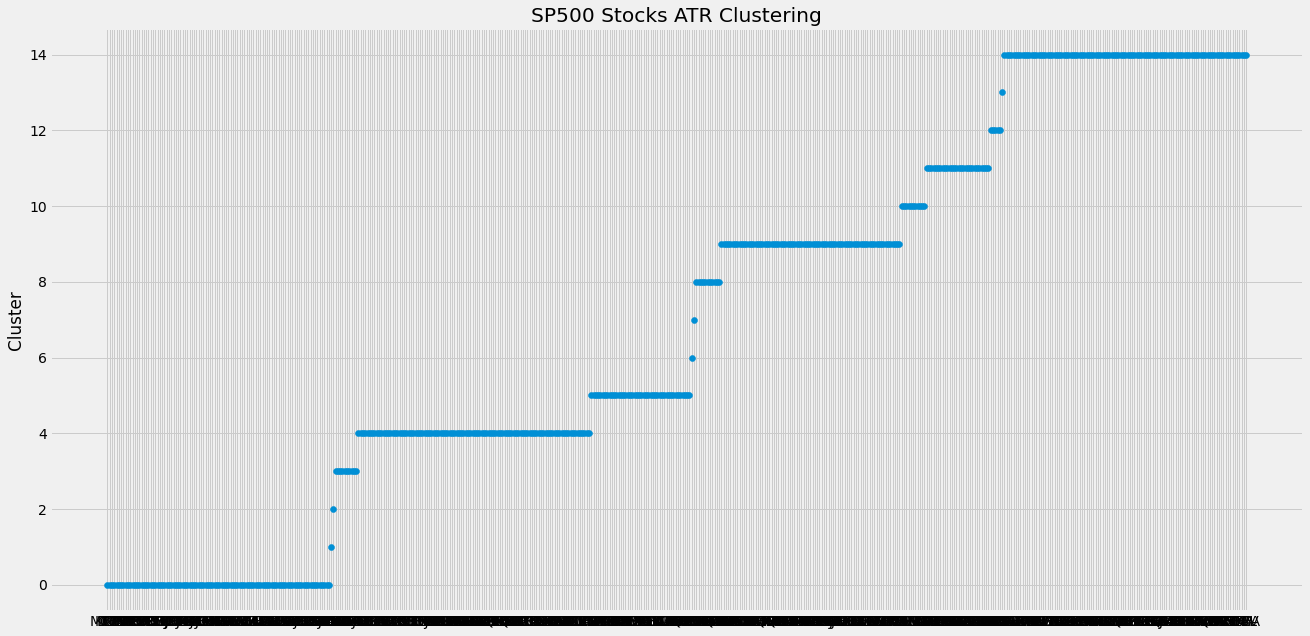

In [44]:
plt.figure(figsize=(20,10))
plt.scatter(df.Companies, df.Cluster)
# plt.xlabel('Stocks')
plt.ylabel('Cluster')
plt.title('SP500 Stocks ATR Clustering');

In [45]:
model.get_params()

{'memory': None,
 'steps': [('normalization', MinMaxScaler()),
  ('cluster', KMeans(n_clusters=15))],
 'verbose': False,
 'normalization': MinMaxScaler(),
 'cluster': KMeans(n_clusters=15),
 'normalization__clip': False,
 'normalization__copy': True,
 'normalization__feature_range': (0, 1),
 'cluster__algorithm': 'auto',
 'cluster__copy_x': True,
 'cluster__init': 'k-means++',
 'cluster__max_iter': 300,
 'cluster__n_clusters': 15,
 'cluster__n_init': 10,
 'cluster__random_state': None,
 'cluster__tol': 0.0001,
 'cluster__verbose': 0}

In [46]:
model['cluster'].cluster_centers_

array([[0.01855097, 0.01855097, 0.01855097, ..., 0.02005857, 0.01949072,
        0.02051712],
       [0.28196157, 0.28196157, 0.28196157, ..., 0.31763139, 0.40681609,
        0.48174602],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.15186947, 0.15186947, 0.15186947, ..., 0.12361973, 0.12618715,
        0.14663444],
       [0.34124959, 0.34124959, 0.34124959, ..., 0.28440614, 0.28916452,
        0.29341823],
       [0.004888  , 0.004888  , 0.004888  , ..., 0.00524365, 0.00512069,
        0.00535799]])

In [47]:
model['cluster'].cluster_centers_.shape

(15, 74)

In [48]:
df.to_csv('cluster_sp500.csv')